In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/SnowData_exp.csv")
df

,Unnamed: 0,Date,Station Name,Station Id,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Air Temperature Observed (degF) Start of Day Values,Barometric Pressure (inch_Hg) Start of Day Values,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Increment - Snow-adj (in),Precipitation Month-to-date (in),Solar Radiation Average (watt/m2),Soil Temperature Observed -2in (degF) Start of Day Values,Soil Temperature Observed -4in (degF) Start of Day Values,Soil Temperature Observed -8in (degF) Start of Day Values,Soil Temperature Observed -20in (degF) Start of Day Values,Soil Temperature Observed -40in (degF) Start of Day Values
0,0,2000-01-01,Apishapa,303,4.1,0.4,12.0,0.0,31.0,NaN,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-01-02,Apishapa,303,4.1,0.0,12.0,0.0,19.0,NaN,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000-01-03,Apishapa,303,4.1,0.0,12.0,0.0,13.0,NaN,7.4,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000-01-04,Apishapa,303,4.1,0.0,15.0,3.0,1.0,NaN,7.7,0.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000-01-05,Apishapa,303,4.5,0.4,14.0,-1.0,27.0,NaN,7.7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799144,799144,2020-12-27,Zirkel,1033,6.0,0.4,25.0,3.0,22.0,NaN,9.0,0.2,0.2,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799145,799145,2020-12-28,Zirkel,1033,6.2,0.2,31.0,6.0,10.0,NaN,9.2,0.5,0.5,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799146,799146,2020-12-29,Zirkel,1033,6.7,0.5,32.0,1.0,19.0,NaN,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799147,799147,2020-12-30,Zirkel,1033,6.7,0.0,32.0,0.0,11.0,NaN,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN


In [3]:
# df=df[df['Station Name']== "Buffalo Park"]
# df

In [4]:
list(df.columns)

['Unnamed: 0',
 'Date',
 'Station Name',
 'Station Id',
 'Snow Water Equivalent (in) Start of Day Values',
 'Change In Snow Water Equivalent (in)',
 'Snow Depth (in) Start of Day Values',
 'Change In Snow Depth (in)',
 'Air Temperature Observed (degF) Start of Day Values',
 'Barometric Pressure (inch_Hg) Start of Day Values',
 'Precipitation Accumulation (in) Start of Day Values',
 'Precipitation Increment (in)',
 'Precipitation Increment - Snow-adj (in)',
 'Precipitation Month-to-date (in)',
 'Solar Radiation Average (watt/m2)',
 'Soil Temperature Observed -2in (degF) Start of Day Values',
 'Soil Temperature Observed -4in (degF) Start of Day Values',
 'Soil Temperature Observed -8in (degF) Start of Day Values',
 'Soil Temperature Observed -20in (degF) Start of Day Values',
 'Soil Temperature Observed -40in (degF) Start of Day Values']

In [6]:
clean_df=df.drop(['Unnamed: 0'],axis=1)
clean_df

,Date,Station Name,Station Id,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Air Temperature Observed (degF) Start of Day Values,Barometric Pressure (inch_Hg) Start of Day Values,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Increment - Snow-adj (in),Precipitation Month-to-date (in),Solar Radiation Average (watt/m2),Soil Temperature Observed -2in (degF) Start of Day Values,Soil Temperature Observed -4in (degF) Start of Day Values,Soil Temperature Observed -8in (degF) Start of Day Values,Soil Temperature Observed -20in (degF) Start of Day Values,Soil Temperature Observed -40in (degF) Start of Day Values
0,2000-01-01,Apishapa,303,4.1,0.4,12.0,0.0,31.0,NaN,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-02,Apishapa,303,4.1,0.0,12.0,0.0,19.0,NaN,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03,Apishapa,303,4.1,0.0,12.0,0.0,13.0,NaN,7.4,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-04,Apishapa,303,4.1,0.0,15.0,3.0,1.0,NaN,7.7,0.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-05,Apishapa,303,4.5,0.4,14.0,-1.0,27.0,NaN,7.7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799144,2020-12-27,Zirkel,1033,6.0,0.4,25.0,3.0,22.0,NaN,9.0,0.2,0.2,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799145,2020-12-28,Zirkel,1033,6.2,0.2,31.0,6.0,10.0,NaN,9.2,0.5,0.5,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799146,2020-12-29,Zirkel,1033,6.7,0.5,32.0,1.0,19.0,NaN,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799147,2020-12-30,Zirkel,1033,6.7,0.0,32.0,0.0,11.0,NaN,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN


In [9]:
df=clean_df.fillna(0)

In [10]:
dates=df['Date'].astype('datetime64[ns]')
dates=dates.dt.dayofyear
df['Date']=dates
one_hot = pd.get_dummies(df['Station Name'])
# Drop column as it is now encoded
df1 = df.drop(['Station Name'],axis = 1)
# Join the encoded df
testing_df = df1.join(one_hot)
# testing_df 
station_list=list(df['Station Name'].unique())
county_list=[]
features_list=['Date','Snow Depth (in) Start of Day Values','Air Temperature Observed (degF) Start of Day Values','Snow Water Equivalent (in) Start of Day Values']
# features_list

In [11]:
y = testing_df['Change In Snow Depth (in)']#.values.reshape(-1, 1)
X=testing_df[features_list].astype('int').values.reshape(-1, len(features_list))
# X.head()

print("Shape: ", X.shape, y.shape)
X

Shape:  (799149, 4) (799149,)


array([[  1,  12,  31,   4],
       [  2,  12,  19,   4],
       [  3,  12,  13,   4],
       ...,
       [364,  32,  19,   6],
       [365,  32,  11,   6],
       [366,  30,  18,   6]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

k: 1, Train/Test Score: 0.920/0.579
k: 3, Train/Test Score: 0.746/0.596
k: 5, Train/Test Score: 0.720/0.614
k: 7, Train/Test Score: 0.705/0.622
k: 9, Train/Test Score: 0.695/0.627
k: 11, Train/Test Score: 0.689/0.631
k: 13, Train/Test Score: 0.684/0.633
k: 15, Train/Test Score: 0.681/0.636
k: 17, Train/Test Score: 0.678/0.637
k: 19, Train/Test Score: 0.676/0.639


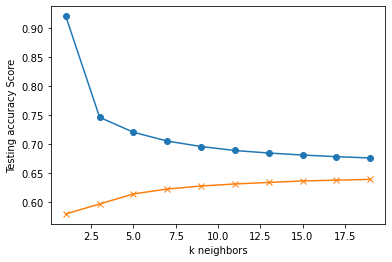

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.639


In [18]:
# new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predicted_class = knn.predict('Apishapa',60)
print(predicted_class)

TypeError: predict() takes 2 positional arguments but 3 were given

Source: [Sklearn Nearest Neighbors](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html)